# Carvana - Classification Problem 

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk

In [131]:
df = pd.read_csv('carvana_mba.csv')

In [132]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,7451,8552,11597,12409,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,7456,9222,11374,12791,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,4035,5557,7146,8702,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,1844,2646,4375,5518,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,3247,4384,6739,7911,19638,33619,FL,4000.0,0,1020


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67270 entries, 0 to 67269
Data columns (total 32 columns):
RefId                                67270 non-null int64
IsBadBuy                             67270 non-null int64
PurchDate                            67270 non-null object
Auction                              67270 non-null object
VehYear                              67270 non-null int64
VehicleAge                           67270 non-null int64
Make                                 67270 non-null object
Model                                67270 non-null object
Trim                                 67270 non-null object
SubModel                             67270 non-null object
Color                                67270 non-null object
Transmission                         67270 non-null object
WheelTypeID                          67270 non-null int64
WheelType                            67270 non-null object
VehOdo                               67270 non-null int64
Nationality 

In [134]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000
mean,36344.861290,0.095630,2005.352966,4.168485,1.493251,71727.835543,6164.700818,7414.887127,8542.039899,9899.771845,6168.741029,7431.972187,8820.813587,10192.698023,26454.859967,58255.647629,6755.693426,0.025033,1278.803196
std,20932.365698,0.294085,1.727841,1.707595,0.521212,14396.937346,2458.874187,2721.127550,3159.118697,3389.425324,2431.857758,2683.422636,3091.584354,3310.765402,25939.263304,26123.753189,1746.197418,0.156228,579.053723
min,1.000000,0.000000,2001.000000,0.000000,1.000000,5368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1400.000000,0.000000,462.000000
25%,18272.250000,0.000000,2004.000000,3.000000,1.000000,62149.000000,4311.000000,5457.000000,6319.000000,7528.250000,4311.000000,5469.000000,6565.000000,7825.000000,17212.000000,32124.000000,5470.000000,0.000000,853.000000
50%,36386.500000,0.000000,2005.000000,4.000000,1.000000,73527.500000,6163.000000,7381.000000,8498.000000,9870.000000,6130.000000,7390.000000,8811.000000,10177.000000,19662.000000,74135.000000,6750.000000,0.000000,1169.000000
75%,54241.750000,0.000000,2007.000000,5.000000,2.000000,82529.750000,7807.750000,9050.000000,10711.750000,12156.000000,7777.000000,9045.000000,10975.000000,12376.000000,22808.000000,80022.000000,7915.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,40308.000000,35722.000000,36859.000000,39080.000000,40308.000000,99761.000000,99224.000000,35900.000000,1.000000,7498.000000


In [135]:
#df.columns

In [136]:
df.isnull().sum()

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPric

# Visualizations

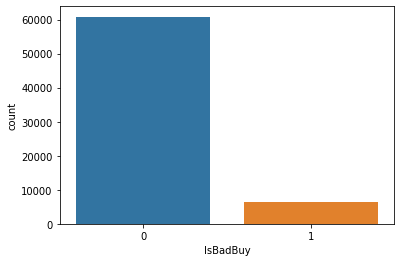

In [137]:
#IsBadBuy - Identifies if the kicked vehicle was an avoidable purchase 
sns.countplot(x='IsBadBuy', data = df)

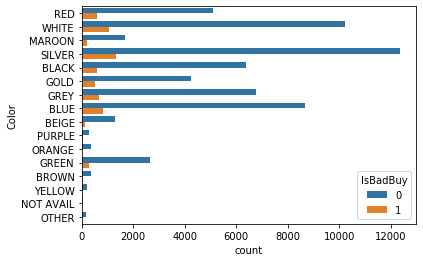

In [138]:
#IsBadBuy - Identifies if the kicked vehicle was an avoidable purchase 
sns.countplot(y = 'Color', hue='IsBadBuy', orient = 'h', data = df)

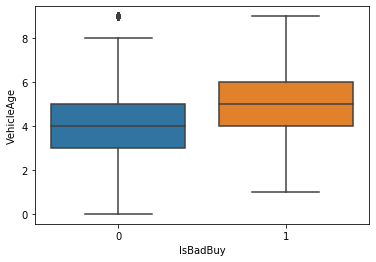

In [139]:
sns.boxplot(x = 'IsBadBuy', y = 'VehicleAge', data = df)

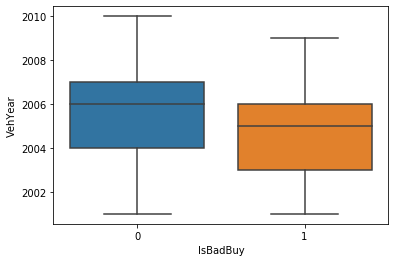

In [140]:
sns.boxplot(x = 'IsBadBuy', y = 'VehYear', data = df)

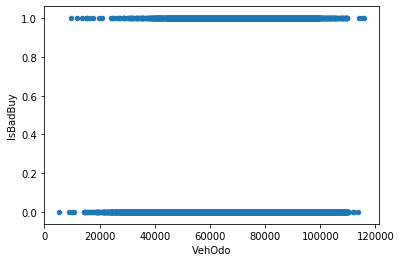

In [141]:
df.plot.scatter(x = 'VehOdo', y='IsBadBuy')

# Baseline Model

In [142]:
baseline = np.empty(len(df['IsBadBuy']))
baseline.fill(0)
baseline

array([0., 0., 0., ..., 0., 0., 0.])

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(df['IsBadBuy'], baseline) )
print(confusion_matrix(df['IsBadBuy'], baseline) )


/Users/annette/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     60837
           1       0.00      0.00      0.00      6433

    accuracy                           0.90     67270
   macro avg       0.45      0.50      0.47     67270
weighted avg       0.82      0.90      0.86     67270

[[60837     0]
 [ 6433     0]]


**Split Data** 

In [144]:
X = df[['Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
        'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
        'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice',
       'IsOnlineSale', 'WarrantyCost']] 

y = df['IsBadBuy']

In [145]:
X.shape

(67270, 23)

In [146]:
y.shape

(67270,)

In [147]:
X = pd.get_dummies(X, drop_first = True)

In [148]:
X.shape

(67270, 1994)

In [149]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 98)

# 1. Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

In [1]:
lm = LogisticRegression(solver = 'lbfgs', max_iter=500)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [152]:
# Measure Performance
from sklearn.metrics import classification_report
print(classification_report( y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12158
           1       0.00      0.00      0.00      1296

    accuracy                           0.90     13454
   macro avg       0.45      0.50      0.47     13454
weighted avg       0.82      0.90      0.86     13454



/Users/annette/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2. Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_predictions))

# 3. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kmodel = KNeighborsClassifier(n_neighbors = 4) 
kmodel.fit(X_train, y_train)

In [ ]:
knn_predictions = kmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_predictions))

# 4. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv_model = SVC()

In [ ]:
# sv_model.fit(X_train,y_train)
# svm_predictions = sv_model.predict(X_test)

In [ ]:
# print(classification_report(y_test, svm_predictions))